## Câu 1
Đọc dữ liệu

In [45]:
data = read.csv('data/ageinc_g.csv')

## Câu 2
In thông tin dữ liệu: head(), số dòng, số cột, summary…

In [2]:
head(data)

,X,income,age,gender
,<int>,<int>,<int>,<chr>
1,0,101743,58,Female
2,1,49597,27,Female
3,2,36517,52,Male
4,3,33223,49,Male
5,4,72994,53,Female
6,5,38361,26,Female


In [11]:
tail(data)

,X,income,age,gender
,<int>,<int>,<int>,<dbl>
995,994,44937,54,2
996,995,70615,29,2
997,996,95102,41,2
998,997,42203,35,2
999,998,16975,31,2
1000,999,123857,44,2


In [3]:
nrow(data)

[1] 1000

In [4]:
ncol(data)

[1] 4

In [5]:
summary(data)

       X             income            age           gender         
 Min.   :  0.0   Min.   :     0   Min.   :18.00   Length:1000       
 1st Qu.:249.8   1st Qu.: 46402   1st Qu.:30.00   Class :character  
 Median :499.5   Median : 78994   Median :39.00   Mode  :character  
 Mean   :499.5   Mean   : 80117   Mean   :39.41                     
 3rd Qu.:749.2   3rd Qu.:114810   3rd Qu.:49.00                     
 Max.   :999.0   Max.   :179294   Max.   :63.00                     

## Câu 3
Tiền xử lý dữ liệu (nếu cần)

In [6]:
# Kiểm tra dữ liệu thiếu
any(is.na(data))

[1] FALSE

In [7]:
# Kiểm tra dữ liệu trùng lặp
sum(duplicated(data))

[1] 0

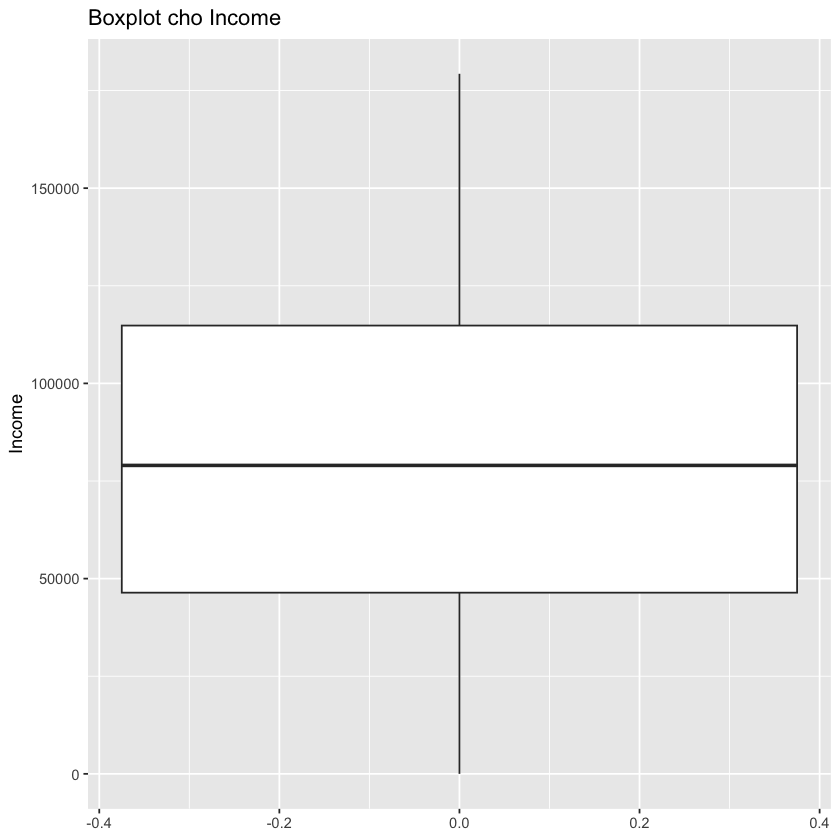

In [46]:
ggplot(data, aes(y = income)) +
  geom_boxplot() +
  labs(y = "Income") +
  ggtitle("Boxplot cho Income")

In [47]:
# Chuyển đổi cột "gender" thành số (ví dụ: male = 1, female = 2)
data$gender <- ifelse(data$gender == "male", 1, 2)

In [48]:
data <- data[, c("income", "age", "gender")]

## Câu 4
Vẽ hình để xem xét mối liên hệ giữa các thuộc tính. Cho nhận xét dựa trên biểu đồ.

In [13]:
library(corrplot)

corrplot 0.92 loaded



In [42]:
cor_matrix <- cor(data)

Warning message in cor(data):
“the standard deviation is zero”


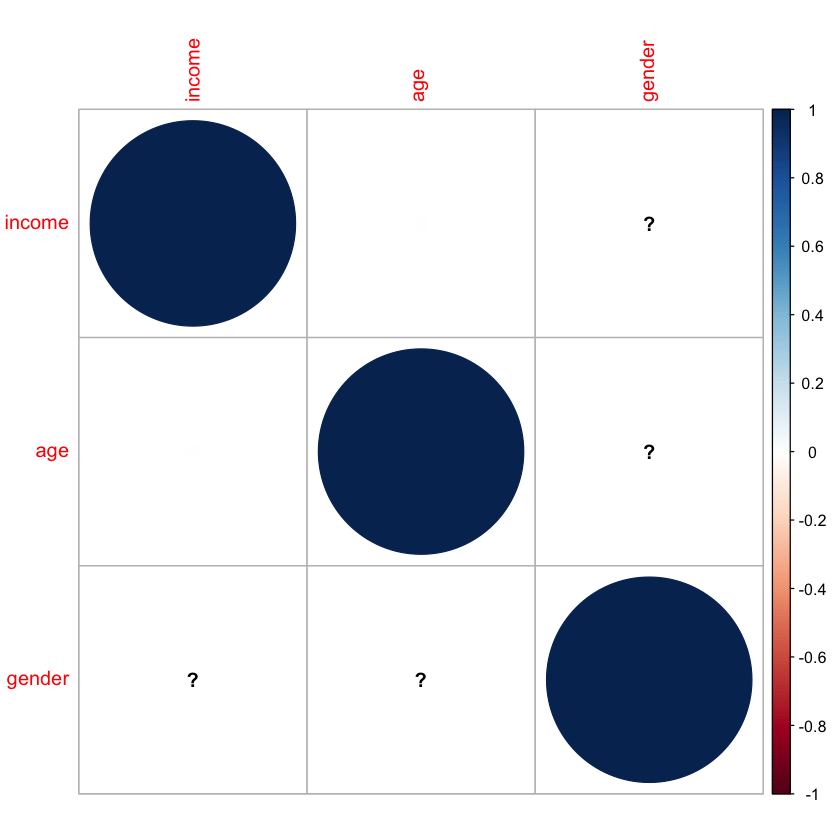

In [49]:
# Vẽ biểu đồ tương quan
corrplot(cor_matrix, method = "circle")

## Câu 5
Xây dựng model từ dữ liệu income và age.

In [19]:
# Lựa chọn các cột income và age
data_subset <- data[, c("income", "age")]

# Chuyển đổi thành ma trận
data_matrix <- as.matrix(data_subset)

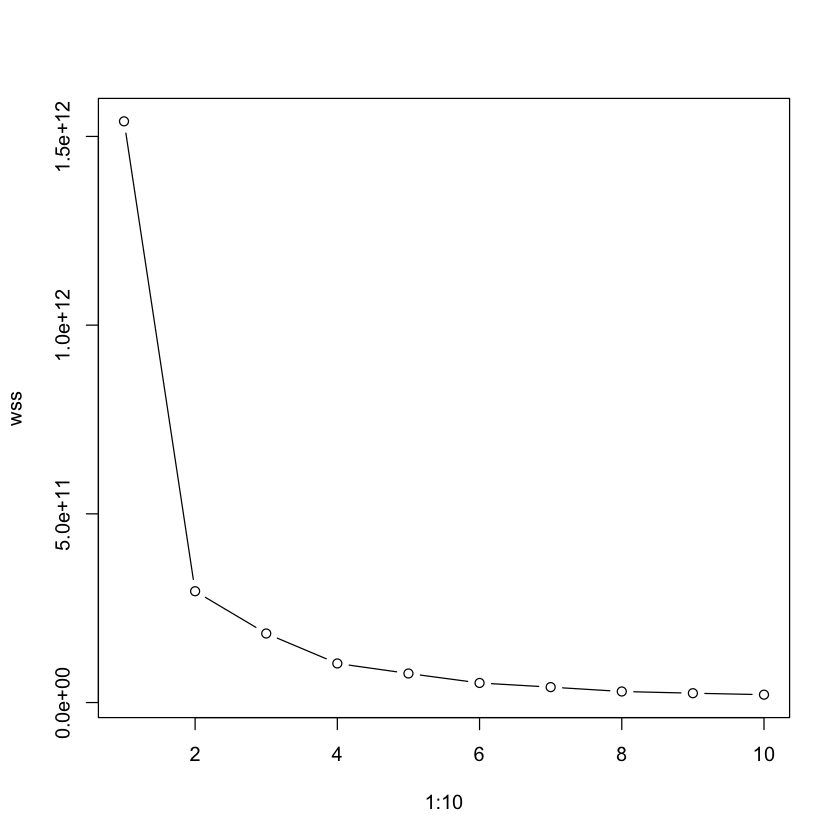

In [24]:
# Tìm k
wss = (nrow(data) - 1)*sum(apply(data,2,var))
for (i in 1:10) wss[i] = sum(kmeans(data_subset, centers=i)$withinss)
plot(1:10, wss, type='b')

In [32]:
# Số cụm (clusters)
k <- 3

# Xây dựng mô hình K-Means
set.seed(20)
kmeans_model <- kmeans(data_matrix, centers = k, nstart = 20)
kmeans_model

K-means clustering with 3 clusters of sizes 440, 223, 337

Cluster means:
     income      age
1  41261.88 39.47500
2  89176.48 39.39013
3 124852.34 39.33828

Clustering vector:
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   2    1    1    1    2    1    1    3    1    1    1    2    1    3    3    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    2    1    2    1    3    2    3    2    3    3    1    3    3    1    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    2    3    2    1    1    1    3    1    1    3    3    3    3    3    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   3    1    3    1    2    1    1    1    1    1    3    1    3    1    3    3 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    3    1    3    3    3    1    2    2    3    1    1    1    3    3    3 
  81   82   

## Câu 6
Tìm kết quả => có bao nhiêu cụm => mẫu nào thuộc cụm nào?

In [33]:
# Các centroids của clusters
centroids <- kmeans_model$centers
print(centroids)

# Labels của các điểm dữ liệu cho biết thuộc cluster nào
cluster_labels <- kmeans_model$cluster
print(cluster_labels)

     income      age
1  41261.88 39.47500
2  89176.48 39.39013
3 124852.34 39.33828
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
   2    1    1    1    2    1    1    3    1    1    1    2    1    3    3    1 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30   31   32 
   3    2    1    2    1    3    2    3    2    3    3    1    3    3    1    2 
  33   34   35   36   37   38   39   40   41   42   43   44   45   46   47   48 
   1    2    3    2    1    1    1    3    1    1    3    3    3    3    3    3 
  49   50   51   52   53   54   55   56   57   58   59   60   61   62   63   64 
   3    1    3    1    2    1    1    1    1    1    3    1    3    1    3    3 
  65   66   67   68   69   70   71   72   73   74   75   76   77   78   79   80 
   1    3    1    3    3    3    1    2    2    3    1    1    1    3    3    3 
  81   82   83   84   85   86   87   88   89   90   91   92   93   94   95   96 
   3    1    2    1    3 

## Câu 7
Vẽ hình (với mỗi cụm là một màu) => xem kết quả. 

In [26]:
library(factoextra)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



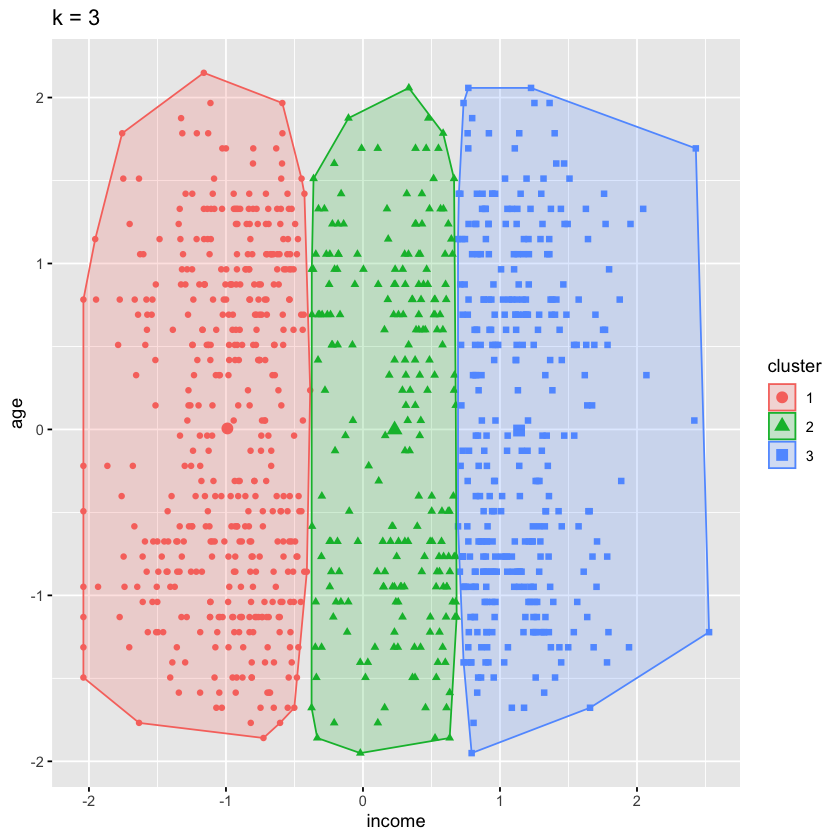

In [35]:
fviz_cluster(kmeans_model, geom='point',data=data_subset) + ggtitle('k = 3')